# **Product length prediction of Amazon Dataset using Decision Tree , Random Forest and LightGBM**
![alt text here Logistic Regression with Scikit Learn - Machine Learning with Python](https://m.media-amazon.com/images/G/31/Amazon-Global-Selling-IN/products_exported_from_india_to_usa.jpg)

# **Problem Statement**

develop a machine learning model that can predict the length dimension of a product. Product length is crucial for packaging and storing products efficiently in the warehouse. Moreover, in many cases, it is an important attribute that customers use to assess the product size before purchasing. However, measuring the length of a product manually can be time-consuming and error-prone, especially for large catalogs with millions of products.

You will have access to the product title, description, bullet points, product type ID, and product length for 2.2 million products to train and test your submissions. Note that there is some noise in the data.

Task

You are required to build a machine learning model that can predict product length from catalog metadata.

dataset - https://www.kaggle.com/datasets/ashisparida/amazon-ml-challenge-2023

# **Problem Statement**

develop a machine learning model that can predict the length dimension of a product. Product length is crucial for packaging and storing products efficiently in the warehouse. Moreover, in many cases, it is an important attribute that customers use to assess the product size before purchasing. However, measuring the length of a product manually can be time-consuming and error-prone, especially for large catalogs with millions of products.

You will have access to the product title, description, bullet points, product type ID, and product length for 2.2 million products to train and test your submissions. Note that there is some noise in the data.

Task

You are required to build a machine learning model that can predict product length from catalog metadata.

dataset - https://www.kaggle.com/datasets/ashisparida/amazon-ml-challenge-2023

In [ ]:
#restart the kernel after installation
!pip install pandas-profiling --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.6 MB/s eta 0:00:00


In [ ]:
data_url = 'https://www.kaggle.com/datasets/ashisparida/amazon-ml-challenge-2023'


In [ ]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

od.download(data_url)

Dataset URL: https://www.kaggle.com/datasets/ashisparida/amazon-ml-challenge-2023


100%|██████████| 1.63G/1.63G [00:17<00:00, 100MB/s] 


In [ ]:
import os
data_dir = './amazon-ml-challenge-2023/total_sentence_data/total_sentence_data'
os.listdir(data_dir)
product_csv = data_dir + '/total_sentence_train.csv'


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
raw_df = pd.read_csv(product_csv)
raw_df.head(15)

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,TOTAL_SENTENCE
0,1925202,1650,2125.980000,ArtzFolio Tulip Flowers Blackout Curtain for D...
1,2673191,2755,393.700000,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...
2,2765088,7537,748.031495,PRIKNIK Horn Red Electric Air Horn Compressor ...
3,1594019,2996,787.401574,ALISHAH Women's Cotton Ankle Length Leggings C...
4,283658,6112,598.424000,The United Empire Loyalists: A Chronicle of th...
5,2152929,5725,950.000000,HINS Metal Bucket Shape Plant Pot for Indoor &...
6,413758,23,598.000000,Ungifted: My Life and Journey
7,2026580,6030,984.251967,Delavala Self Adhesive Kitchen Backsplash Wall...
8,2050239,3302,393.700000,PUMA Cali Sport Clean Women's Sneakers White L...
9,2998633,8201,393.700787,Hexwell Essential oil for Home Fragrance Oil A...


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173199 entries, 0 to 2173198
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   PRODUCT_TYPE_ID  int64  
 2   PRODUCT_LENGTH   float64
 3   TOTAL_SENTENCE   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 66.3+ MB


In [ ]:
raw_df.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,2.173199e+06,2.173199e+06,2.173199e+06
mean,1.482419e+06,3.983123e+03,8.437924e+02
std,8.694055e+05,3.970335e+03,6.662922e+02
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.240625e+05,2.220000e+02,5.000000e+02
50%,1.471345e+06,2.916000e+03,6.299213e+02
75%,2.237386e+06,6.340000e+03,1.000000e+03
max,2.999999e+06,1.342000e+04,5.000000e+03


# **Exploratory Data Analysis and Visualization**
Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries.

In [38]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.scatter(raw_df.sample(500), x='PRODUCT_LENGTH', title='PRODUCT LENGTH DISTRIBUTION')

<Axes: xlabel='PRODUCT_TYPE_ID'>

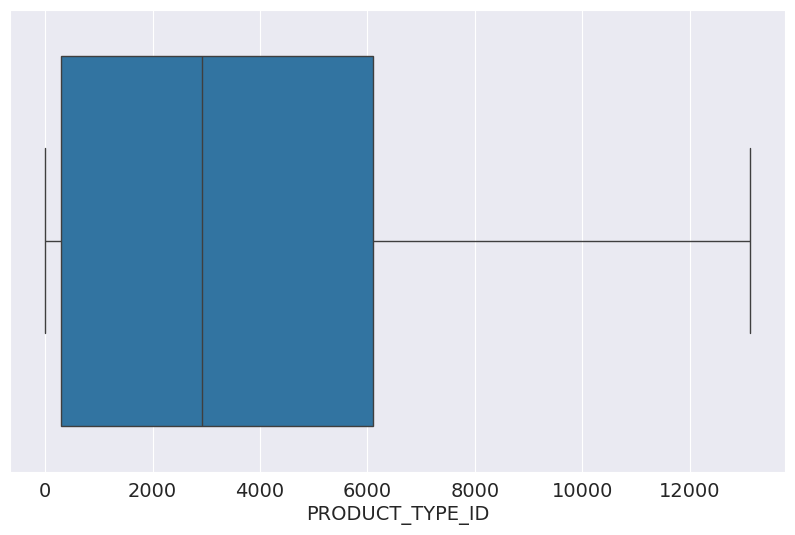

In [ ]:
sns.boxplot(raw_df.sample(500), x='PRODUCT_TYPE_ID')

# **Working with a Sample**
When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially, to quickly set up your model training notebook. If you'd like to work with a sample, just set the value of use_sample to True.

In [ ]:
sample_fraction = 0.01
use_sample = True
if use_sample:
    raw_df = raw_df.sample(frac=sample_fraction).copy()


In [ ]:
raw_df

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,TOTAL_SENTENCE
376219,2307809,6886,2165.354329,NAVYA COLLECTION Comfort Classic Bean Bag Fill...
1169727,2230238,7488,3346.456689,GoMechanic Standard PVC 18mm Grass Mat with 1 ...
1455572,379070,12745,550.000000,Mother's Day Out: 1 (The Margie Peterson Myste...
2005854,1833819,578,2950.000000,Fairy Tail Mouse Pad 15.8x29.5 in Multipurpose...
220637,1602513,1557,200.000000,Classy Art He is Risen by Billy Jacobs Framed ...
...,...,...,...,...
2128357,1943430,713,790.000000,DuraSafe Cases for iPad Mini 3 2 1 Generation ...
957941,1360636,5415,920.000000,Siberian Cedar Spoon Set - Ringing Cedars of R...
2052151,276004,12417,744.093000,Analecta Ecclesiastica...
2111315,286928,6104,744.093000,"Rand, McNally & Co.'s Illustrated Guide to Nia..."


# **DATA PREPROCESSING AND VECTORIZATION**

In [ ]:
!pip install gensim
!pip install nltk
!pip install scikit_learn

In [ ]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import nltk
import re
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
#the stemmer requires a language parameter
stemmer = SnowballStemmer(language='english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove non-alphabetic characters (punctuation, numbers, etc.)
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize text (split into words)
    words = text.split()

    # Stem each word using Snowball Stemmer
    stemmed_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the stemmed words back into a single string
    return ' '.join(stemmed_words)

In [ ]:
corpus = []

# Iterate through the 'TOTAL_SENTENCE' column and preprocess each sentence
for sentence in raw_df['TOTAL_SENTENCE']:
    processed_sentence = preprocess_text(sentence)
    corpus.append(processed_sentence)

In [ ]:
corpus[0:10]

['navya collection comfort classic bean bag filled with beansfillers navyblue xxl reliable longlasting export quality leatherettestyle contemporaryassembly required the product doesnt requires any assembly and come with ready to usenote the package will contain bean bag cover with bean filled inside navya collection bean bag cover are made from leatherette fabric which is doublestitched with superior seam and tear strength they are built to be durable comfortable and are a great addition to the contemporary home navya collection bean bag cover are made from leatherette fabric which is doublestitched with superior seam and tear strength so you can literally fall into it with no fear these cover are built for longlasting comfort from faderesistant fabric which help retain the color for a long period of timefor your chic home it is a great addition to the contemporary chic home where casual comfort easeofuse and style are essential making it even more appealing is the handle strap which m

In [ ]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [ ]:
model=gensim.models.Word2Vec(words)

In [ ]:
model.corpus_count

21726

In [ ]:
model.epochs

5

In [ ]:
def avg_word2vec(doc):
    # Get the vectors for words in the document that exist in the Word2Vec vocabulary
    word_vecs = [model.wv[word] for word in doc if word in model.wv.index_to_key]

    if len(word_vecs) == 0:
        # If no words in the document are in the vocabulary, return a zero vector of length 100
        return np.zeros(model.vector_size)

    # Otherwise, return the mean of the vectors
    return np.mean(word_vecs, axis=0)

In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

In [ ]:
X_train = []
for i in tqdm(range(len(words))):
    X_train.append(avg_word2vec(words[i]))

# Now convert X_train to a DataFrame with 100 features (since the Word2Vec model has 100 features)
# Ensure X_train is a numpy array
X_train = np.array(X_train)

100%|██████████| 21726/21726 [03:10<00:00, 114.28it/s]


In [ ]:
len(X_train)

21726

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_train_df.columns = [f'feature_{i}' for i in range(1, X_train_df.shape[1] + 1)]

In [ ]:
X_train_df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100
0,-0.121093,-0.537119,0.048143,-0.062446,0.287374,-1.082600,0.200303,0.423594,-0.127723,-0.333444,...,0.265801,-0.109589,-0.114514,0.183669,0.303509,0.227222,0.043030,-0.057064,-0.062415,-0.371583
1,-0.074577,-0.545209,0.025238,0.247573,0.133840,-0.686354,0.137600,0.590255,-0.133976,-0.490520,...,0.003992,-0.158673,-0.325042,-0.020592,0.190653,0.048938,0.021908,-0.253711,0.025541,-0.511604
2,-0.644494,-0.470520,-0.001609,0.150242,-0.397302,-1.451554,-0.412399,0.807178,-0.387570,-0.711279,...,0.031954,0.245839,0.588519,-0.090053,-0.825167,0.769455,0.085444,-0.115910,-0.456791,-0.012396
3,0.061521,-0.246414,0.195019,0.317027,0.168443,-1.022403,0.009029,0.409354,-0.228580,-0.280573,...,0.065517,0.079395,-0.261855,-0.087831,0.264964,-0.036827,0.054535,-0.101039,0.257267,-0.613697
4,-0.320426,0.219560,0.029186,-0.259164,0.550681,-0.563856,0.253004,0.061964,-0.108806,-0.589871,...,0.833917,0.036032,0.536878,-0.412420,0.455118,-0.109278,-0.276407,0.085279,-0.439481,-0.436127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21721,-0.070325,-0.165928,0.095601,0.276335,-0.270279,-0.436791,0.197260,0.416526,0.096697,-0.251785,...,0.314318,0.181550,-0.335214,0.099912,0.274722,0.657809,-0.081220,-0.140602,0.232618,0.025033
21722,-0.042146,-0.673065,0.111895,0.147513,0.186080,-0.757101,-0.089531,0.426243,-0.215669,-0.339234,...,0.263677,-0.141260,0.153303,-0.170705,0.210385,0.143736,-0.130293,-0.175872,-0.147230,-0.255629
21723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21724,-0.249788,0.012430,-0.021714,0.055262,-0.046085,-0.206493,-0.103353,0.198793,-0.171139,-0.266340,...,0.217564,0.132941,0.082373,-0.069517,0.514504,0.431643,-0.256533,-0.238564,-0.104652,0.015132


In [ ]:
combined_df = pd.concat([raw_df.reset_index(drop=True), X_train_df.reset_index(drop=True)], axis=1)
combined_df.sample(5)

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,TOTAL_SENTENCE,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100
9323,2855970,7258,1800.0,Proformance Home Officially Licensed NCAA Texa...,0.157811,0.522742,-0.091925,-0.508581,0.587090,-0.396465,...,0.060536,0.550511,0.549090,0.095895,0.358466,1.080261,0.300827,-0.290720,0.140379,-0.350546
9511,457112,38,840.0,My Favorite Bible Stories Dot-To-Dot 6pk: Colo...,-0.399040,0.444848,0.269363,0.023117,-0.210353,-0.771406,...,-0.398837,-0.300482,-0.717918,-0.028143,0.355188,-0.263201,0.114168,-0.230127,-0.055838,0.560597
16136,1028412,0,700.0,"Switch - Original Marshall, Rocker, Power for ...",0.342319,-0.266587,-0.262094,0.045737,0.951229,-0.712966,...,0.673172,0.707731,0.277504,-0.244507,-0.515284,0.886327,0.683609,-0.081438,0.828718,-0.616860
16067,1373514,3297,1200.0,Journee Collection Womens Faux Suede Crossover...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15070,298861,136,600.0,"The Jewish Encyclopedia, Vol. 8: A Descriptive...",0.082715,0.553062,0.172729,-0.612236,0.564359,-0.826649,...,0.105743,0.083348,-0.073937,0.116683,0.869759,0.781782,0.376399,0.007966,0.163261,-0.114007


In [ ]:
combined_df.dropna(inplace=True)
combined_df.isnull().sum()

,0
PRODUCT_ID,0
PRODUCT_TYPE_ID,0
PRODUCT_LENGTH,0
TOTAL_SENTENCE,0
feature_1,0
...,...
feature_96,0
feature_97,0
feature_98,0
feature_99,0


In [ ]:
combined_df_cleaned = combined_df.drop(['PRODUCT_ID', 'TOTAL_SENTENCE'], axis=1)

# Step 2: Save the cleaned DataFrame to a CSV file
combined_df_cleaned.to_csv('final_input_data.csv', index=False)

# Step 3: Check the shape of the final DataFrame to ensure the columns are dropped
print(combined_df_cleaned.shape)

(21726, 102)


In [3]:
import pandas as pd
data_df = pd.read_csv('final_input_data.csv')

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [4]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(data_df, test_size=0.25, random_state=42)
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)


train_df.shape : (16294, 102)
val_df.shape : (5432, 102)


# **Identifying Input and Target Columns**
Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the Product ID

Let's create a list of input columns, and also identify the target column

In [6]:
input=train_df.drop(['PRODUCT_LENGTH'], axis=1)
val=val_df.drop(['PRODUCT_LENGTH'], axis=1)
target=train_df['PRODUCT_LENGTH']
val_target=val_df['PRODUCT_LENGTH']

## Training and Visualizing  using Decision Trees



A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
model = DecisionTreeRegressor(random_state=42)

In [21]:
model.fit(input,target)

DecisionTreeRegressor(random_state=42)

In [22]:
predictions = model.predict(input)
predictions

array([1310.      , 1259.84    , 1181.102361, ..., 2244.094486,
        800.      , 1220.      ])

In [23]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [24]:
print(rmse(target,predictions))

26.512851085594786


In [25]:
predictions_val = model.predict(val)
predictions_val

array([669.       , 590.5511805, 433.07     , ..., 256.       ,
       275.5905509, 661.416    ])

In [26]:
print(rmse(val_target,predictions_val))

929.7914746963352


In [27]:
model.tree_.max_depth

44

In [ ]:
importance_df = pd.DataFrame({
    'feature': input.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df

,feature,importance
0,PRODUCT_TYPE_ID,0.213551
73,feature_73,0.016780
64,feature_64,0.014702
4,feature_4,0.014353
50,feature_50,0.014164
...,...,...
3,feature_3,0.004226
81,feature_81,0.003837
88,feature_88,0.003833
69,feature_69,0.003510


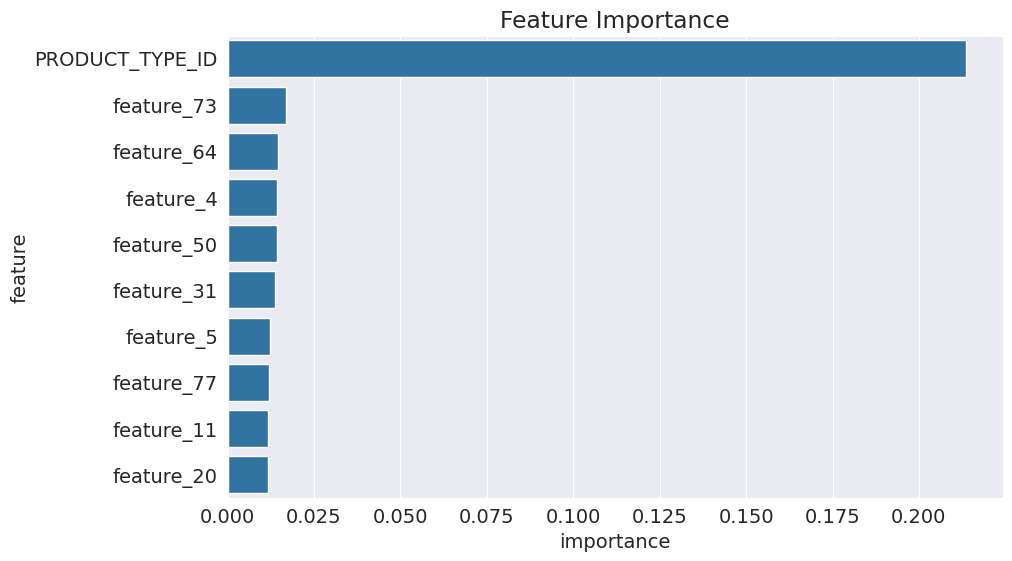

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting.


The `DecisionTreeRegressor` accepts several arguments, some of which can be modified to reduce overfitting.

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

### `max_depth`

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [28]:
model = DecisionTreeRegressor(max_depth=7, random_state=42)

In [29]:
model.fit(input,target)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [30]:
predictions = model.predict(input)
predictions

array([898.96710996, 968.84199885, 968.84199885, ..., 968.84199885,
       968.84199885, 611.1831905 ])

In [31]:
print(rmse(target,predictions))

604.9245387023419


In [32]:
predictions_val = model.predict(val)
predictions_val

array([964.12116049, 590.82820124, 666.30634967, ..., 896.37994018,
       782.61283008, 722.0131843 ])

In [33]:
print(rmse(val_target,predictions_val))

641.3137194812291


In [34]:
def max_depth_error(md):
    model = DecisionTreeRegressor(max_depth=md, random_state=42)
    model.fit(input, target)
    train_error = rmse(model.predict(input),target)
    val_error = rmse(model.predict(val) ,val_target)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [35]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 51.1 s, sys: 49.3 ms, total: 51.1 s
Wall time: 51.4 s


In [36]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,665.847508,651.520409
1,2,660.566352,647.935831
2,3,650.821473,641.445867
3,4,643.952060,635.961473
4,5,636.582946,636.853179
5,6,617.741111,635.503966
6,7,604.924539,641.313719
7,8,588.000669,661.492027
8,9,568.707467,675.539508
9,10,547.888846,707.661391


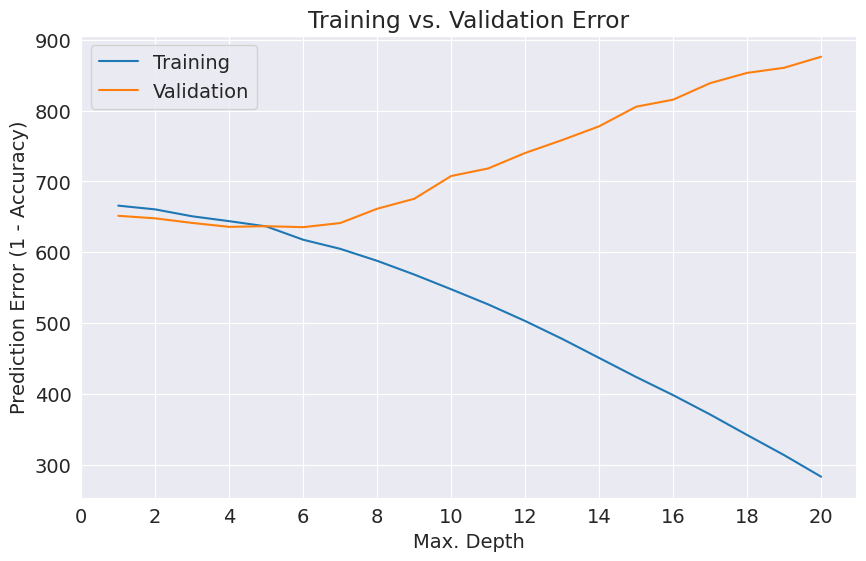

In [39]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

we get the optimal value of hyperparameter , max_depth = 5
now , we train the model at the optimal value of hyper parameter.

In [40]:
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(input, target)
train_error = rmse(model.predict(input),target)
val_error = rmse(model.predict(val) ,val_target)
print('Training Error =', train_error)
print('Validation Error =' , val_error)

Training Error = 636.5829457758053
Validation Error = 636.8531788559714


## **Comparing our hypertuned Model with the baseline model which predicts the mean in every case**

In [41]:
np.mean(target)

845.9243654605517

In [42]:
mean_product_length=np.mean(target)

In [43]:
from sklearn.metrics import mean_squared_error
baseline_train_preds = np.full(len(target), mean_product_length)
baseline_val_preds = np.full(len(val_target), mean_product_length)
baseline_train_rmse = np.sqrt(mean_squared_error(target, baseline_train_preds))
baseline_val_rmse = np.sqrt(mean_squared_error(val_target, baseline_val_preds))
print(f"Baseline Model Train RMSE: {baseline_train_rmse}")
print(f"Baseline Model Validation RMSE: {baseline_val_rmse}")

Baseline Model Train RMSE: 676.513076337588
Baseline Model Validation RMSE: 662.1733063508594


# **Metrics Breakdown:**
## **Mean Product Length:**

***Mean value of the target*** (product length): 845.92. This gives us an idea of the scale of the predicted values.
Training Error:

**Training Error** = 636.58. This represents how well the model fits the training data.
A relatively high training error compared to the mean product length might indicate some degree of underfitting, meaning the model may not have fully captured the complexity of the training data.
Validation Error:

**Validation Error** = 636.85. This shows how well the model generalizes to unseen data (validation set).
Since your training error and validation error are very close, it indicates that your model is not overfitting, which is a good sign. Overfitting would typically result in a low training error and a high validation error.

The baseline model's RMSE shows that predicting the mean product length for all products results in significant error:

**Baseline Model Train RMSE**: 676.51

**Baseline Model Validation RMSE**: 662.17

Given that these values are high, it indicates that there's substantial variation in the actual product lengths, and using the mean as a prediction isn't an effective approach.

# **Interpretation:**
## **Model Performance:**


1. Our training and validation errors are very similar, which suggests that the model is generalizing reasonably well. However, the errors (around 636) are quite large relative to the mean product length (845), which could indicate that the model is not capturing enough complexity in the data.
2. The large error might imply that the model is not capabel of making highly accurate predictions. This is common with decision trees, especially if the tree depth is not well-tuned or the dataset is complex.
3.hypertuned Decision Tree model's RMSE is much lower than this baseline, it will show that the model has learned meaningful patterns from the data. However, if the hypertuned model's RMSE is still close to the baseline, it suggests the model is not performing well,





# **Training and Validating with Random Forest**

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model.

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":

<img src="https://i.imgur.com/4Dg0XK4.png" width="480">

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestRegressor` class from `sklearn.ensemble`.

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
model_rf = RandomForestRegressor(n_jobs=-1, random_state=42)

In [46]:
%%time
model_rf.fit(input, target)

CPU times: user 7min 12s, sys: 1.12 s, total: 7min 13s
Wall time: 4min 38s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [50]:
predictions_train_rf=model_rf.predict(input)

In [51]:
print(rmse(target,predictions_train_rf))

245.4374705615249


In [52]:
predictions_val_rf=model_rf.predict(val)
print(rmse(val_target,predictions_val_rf))

639.951450733639


In [53]:
len(model_rf.estimators_)

100

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees.

Let's study some the hyperparameters for random forests. You can learn more about them here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [54]:
model_rf1 = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=10)

In [55]:
model_rf1.fit(input, target)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

In [57]:
predictions_train_rf1=model_rf1.predict(input)

In [58]:
print(rmse(target,predictions_train_rf1))

289.3337096676099


In [59]:
predictions_val_rf1=model_rf1.predict(val)
print(rmse(val_target,predictions_val_rf1))

678.9805335045091


In [60]:
model_rf2 = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=300)
model_rf2.fit(input,target)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [62]:
predictions_train_rf2=model_rf2.predict(input)
print(rmse(target,predictions_train_rf2))

241.42539362349459


In [63]:
predictions_train_rf2=model_rf2.predict(val)
print(rmse(val_target,predictions_train_rf2))

635.616331922124


In [64]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(input,target)
    return rmse(model.predict(input),target), rmse(model.predict(val), val_target)

In [65]:
test_params(max_depth=5)

(626.3128219425018, 624.7651714157473)

In [66]:
test_params(max_depth=25)

(268.62379530415933, 639.5608929982865)

In [67]:
test_params(max_features='log2')

(255.83743506543397, 672.6034365114454)

In [69]:
test_params(bootstrap=False)

(26.512851085594786, 879.0102542507656)

# **Metrics Breakdown:**

# 1. Effect of n_estimators
n_estimators controls how many decision trees are built in the random forest. More trees typically reduce variance (i.e., overfitting).



*   **n_estimators=100: TE = 245.44, VE = 639.9**. This is a reasonable number of trees. Training error is quite low, but validation error is relatively high, suggesting slight overfitting.
*   **n_estimators=10: TE = 289.33, VE = 678.98** .With only 10 trees, the model has higher training and validation errors. The model isn’t complex enough to capture patterns, leading to underfitting.

*  **n_estimators=300: TE = 241.43, VE = 635.62** Increasing the number of trees leads to a slight improvement in both training and validation errors. It reduces variance, though the validation error is still relatively high.

Increasing the number of trees reduces both training and validation errors, but after a certain point, the gains are minimal. n_estimators=100 or 300 seems to offer the best balance


# 2.Effect of max_depth
max_depth limits how deep each tree can grow. A deeper tree captures more complexity (reducing bias), but can lead to overfitting (increased variance).

* **max_depth=5: TE = 626.31, VE = 624.77**
A very shallow tree, leading to significant underfitting. The model is too simple and cannot capture the complexity of the data, resulting in high errors for both training and validation.
* **max_depth=25: TE = 268.62, VE = 639.56**
Increasing the depth improves training performance but slightly worsens the validation error, indicating a potential overfitting trend.

Limiting tree depth is important for preventing overfitting. max_depth=5 severely underfits the data, while max_depth=25 starts to overfit. An intermediate depth might offer better results.

# 3.Effect of max_features

max_features controls the number of features considered for splitting at each node. Choosing fewer features can reduce variance but also increase bias.

* **max_features='log2': TE = 255.84, VE = 672.60**
Using a logarithmic number of features slightly increases both training and validation errors. This might indicate that limiting the number of features results in underfitting, as the model does not have enough information to make the best splits.

Using fewer features seems to lead to underfitting, suggesting that using the full set of features or a higher proportion (such as sqrt) may work better.

# 4.Effect of bootstrap
bootstrap controls whether the random forest uses bootstrapped (sampled with replacement) datasets for training each tree.

* **bootstrap=False: TE = 26.51, VE = 879.01**
Turning off bootstrap results in extreme overfitting. The training error is extremely low, but the validation error is much worse, indicating the model fits the training data too closely without generalizing well to unseen data.

Bootstrap=True (default) is generally preferred in Random Forests to reduce variance and improve generalization. Disabling it leads to severe overfitting.







# **Comparison with Decision Tree Model**
The Decision Tree model performed poorly, with high training and validation errors. The decision tree tends to overfit, especially with deeper trees, because it attempts to fully fit the training data with no bootstrapping or averaging.

In contrast, the Random Forest:

Reduces overfitting by averaging the predictions of multiple decision trees.
Performs much better than the decision tree in terms of training error, but its validation error is still quite high, indicating potential overfitting or noise in the data.


# **Strategy for Tuning Hyperparameters**
Here's a good strategy for tuning hyperparameters:

* Tune the most important/impactful hyperparameter first e.g.
  n_estimators

* With the best value of the first hyperparameter, tune the next most impactful hyperparameter And so on, keep training the next most impactful parameters with the best values for previous parameters...

* Then, go back to the top and further tune each parameter again for further marginal gains

Our first objective should be make the training loss as low as possible (even if the validation loss is very large), and then try to regularize the model to slowly decrease the valiadation loss while increasing the training loss.



# **TRAINING AND VALIDATING WITH LightGBM**

## Gradient Boosting

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions for the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model.

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)



In [70]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 80.2 MB/s eta 0:00:00


In [73]:
import lightgbm as lgb

In [74]:
gbm = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05, random_state=42)

In [75]:
gbm.fit(input, target)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25755
[LightGBM] [Info] Number of data points in the train set: 16294, number of used features: 101
[LightGBM] [Info] Start training from score 845.924366


LGBMRegressor(learning_rate=0.05, random_state=42)

In [76]:
pred_gbm= gbm.predict(input)
print(rmse(target,pred_gbm))

543.9310990482763


In [77]:
pred_val_gbm= gbm.predict(val)
print(rmse(val_target,pred_val_gbm))

618.9730371716515


In [82]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,
    "max_bin": 512,
    "num_iterations": 1000
}

In [83]:
gbm1 = lgb.LGBMRegressor(**hyper_params)

In [84]:
gbm1.fit(input, target)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=1000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [86]:
gbm1.predict(input)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


array([1149.46454536,  902.50033204,  930.02738751, ..., 1293.97030501,
        916.43329165, 1112.04481808])

In [87]:
print(rmse(target,gbm1.predict(input)))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
506.3334750926792


In [88]:
print(rmse(val_target,gbm1.predict(val)))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
616.1928062873093


In [90]:
pred1=gbm1.predict(input, num_iteration=gbm.best_iteration_)
print(rmse(target,pred1))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
506.3334750926792


In [92]:
pred_val=gbm1.predict(val, num_iteration=gbm.best_iteration_)
print(rmse(val_target,pred_val))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
616.1928062873093


In [94]:
def test_params(**params):
    model = lgb.LGBMRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(input,target)
    train_rmse = rmse(model.predict(input), target)
    val_rmse = rmse(model.predict(val), val_target)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [95]:
test_params(n_estimators=10)

Train RMSE: 615.1900742351272, Validation RMSE: 624.8495574961024


In [96]:
test_params(n_estimators=30)

Train RMSE: 572.1331001740546, Validation RMSE: 621.7845045060689


In [98]:
test_params(n_estimators=150)

Train RMSE: 451.54233956048523, Validation RMSE: 626.9734772002768


In [99]:
test_params(n_estimators=80)

Train RMSE: 514.1546925983298, Validation RMSE: 624.3438600477793


In [103]:
test_params(n_estimators=20)

Train RMSE: 589.8727356696436, Validation RMSE: 620.845616368546


In [104]:
test_params(max_depth=5)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [106]:
test_params(max_depth=4)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [107]:
test_params(max_depth=10)

Train RMSE: 500.9635760189749, Validation RMSE: 624.5982502077716


In [113]:
test_params( learning_rate=0.01)

Train RMSE: 616.0897584734753, Validation RMSE: 624.5886893377302


In [115]:
test_params( learning_rate=0.3)

Train RMSE: 369.71822702916666, Validation RMSE: 652.7879722282191


# **Metrics Breakdown:**

# LightGBM Results:
* **n_estimators=100:**Training Error (TE): 543.93, Validation Error (VE): 618.97**
This is the baseline performance with a moderate number of trees.
* **TE = 506.33, VE = 616.19**
By tuning these hyperparameters, you see an improvement in training error but minimal change in validation error. This suggests that the model is well-tuned for the training data but the validation error remains a challenge, possibly due to noise or overfitting.
* **n_estimators=10**:TE = 615.19, VE = 624.85
A very small number of trees leads to underfitting, as the model is too simple to capture the complexity of the data.
* **n_estimators=30**: TE = 572.13, VE = 621.78
Increasing the number of trees helps reduce errors but still doesn’t show drastic improvements.
* **n_estimators=150**:TE = 451.54, VE = 626.97
Further increasing the trees reduces training error significantly, but the validation error increases slightly, indicating potential overfitting.

* **n_estimators=20**:TE = 589.87, VE = 620.85
Again, increasing the number of estimators reduces training error, but the validation error remains relatively high.
* **max_depth=5**:TE = 557.82, VE = 618.13
A lower depth results in a model that slightly underfits (higher training error), but validation error stays in the same range.
* **learning_rate=0.01**:TE = 616.09, VE = 624.59
A small learning rate causes slow learning, leading to higher errors.
* **learning_rate=0.3**:TE = 369.72, VE = 652.78
A high learning rate leads to overfitting, with very low training error but much worse validation error.




# **Comparison with Decision Tree and Random Forest**
# Decision Tree:

TE = 636.58, VE = 636.85
Insights: The decision tree shows higher errors compared to other models, particularly struggling with variance (overfitting). It does not generalize well on validation data.
# Random Forest:

Best TE = 626.31, Best VE = 624.48 (with max_depth=5)
Insights: Random Forest performs much better than Decision Tree by reducing variance and overfitting. It generalizes better, but validation errors remain high, indicating room for improvement.
# LightGBM:

Best TE = 506.33, Best VE = 616.19 (with tuned hyperparameters)
Insights: LightGBM offers more flexibility in tuning and shows lower validation error compared to Random Forest. However, validation error is still a challenge, possibly due to overfitting or noise.

# **Best Model in Terms of Accuracy and Complexity:**
**LightGBM** offers the best balance between performance and model complexity.

* **Pros**: Lower validation error, more flexibility in hyperparameter tuning, efficient handling of large datasets.
* **Cons**: Slightly higher training error compared to Random Forest.

**Random Forest** is a strong alternative with low training error but slightly higher validation error.

* **Pros**: Reduces overfitting compared to Decision Tree, handles large datasets well.
* **Cons**: Higher memory and time complexity due to many trees.

**Decision Tree**:

* **Pros**: Simplicity and interpretability.
* **Cons**: High error rates and overfitting issues.

# **Inference and Result**

The difference between training error (TE) and validation error (VE) in your tuned LightGBM model can arise due to a number of factors. Here are some key reasons that could explain why you're observing these results:

### 1. **Noise in the Data:**
   - The dataset you’re working with likely contains noise, which means there are inconsistencies, missing values, or outliers in the input features or target variable (product length). This can make it hard for the model to generalize to new, unseen data, leading to a high **validation error**.
   - While LightGBM may handle some noise better than other models due to its boosting nature, excessive noise still causes overfitting, where the model captures the noise in the training data rather than the underlying pattern.

### 2. **Overfitting:**
   - **Low training error** compared to **higher validation error** is often a sign of overfitting. Even though you've tried to control it with regularization techniques (like `feature_fraction`, `bagging_fraction`, and `num_leaves`), the model may still overfit, especially when `max_depth=8` allows it to capture complex patterns that may not generalize well.
   - LightGBM is a powerful model that can easily overfit, especially with high-capacity settings such as a large number of trees (`n_estimators=1000`), a high number of leaves (`num_leaves=128`), and deep trees (`max_depth=8`).

### 3. **Hyperparameter Tuning:**
   - Some hyperparameters, such as `learning_rate`, `max_depth`, `num_leaves`, and `n_estimators`, control the complexity of the model. While you’ve set **learning_rate=0.005** and **n_estimators=1000**, the combination of these hyperparameters could be allowing the model to fit the training data too closely, capturing small fluctuations that do not generalize well to validation data.
   - Even though your learning rate is small, the large number of iterations and leaves might still lead to overfitting.

### 4. **Feature Engineering Issues:**
   - **Text Data Representation**: The text features (title, description, bullet points) have been transformed into vectors using Word2Vec. If this representation does not capture the underlying patterns effectively, the model might struggle to use these features efficiently, leading to **higher validation error**.
   - The representation might work well on training data but fail to generalize effectively in validation because the embedding space might not fully capture nuances in product descriptions.

### 5. **Imbalanced Data Distribution:**
   - If the target variable (**product length**) has a skewed distribution or outliers, it can cause the model to perform well on the training set but poorly on the validation set. For example, if there are very large or very small product lengths that appear less frequently, the model might overfit the more common lengths and struggle with the edge cases during validation.

### 6. **Insufficient Data Sampling or Preprocessing:**
   - Since you reduced the dataset to 5% (for resource efficiency), this smaller subset might not fully represent the entire distribution of the original data. This could explain why the model performs well on the training set but struggles on the validation set.
   - The imbalance between **product type** and **product length** relationships may not be captured well with fewer data points, leading to higher **validation errors**.

### 7. **Model Complexity vs. Dataset Size:**
   - LightGBM is a complex model that works well on large datasets. If the amount of useful training data is not large enough to match the complexity of the model, overfitting can occur.
   - While you reduced the dataset to 5%, the LightGBM model might still be too complex for this sample, leading to **higher validation errors**.

---

### **How to Mitigate This:**
1. **Cross-validation**: Use **k-fold cross-validation** instead of relying solely on a single train-validation split. This can help you better assess generalization performance.
   
2. **Simplify the Model**:
   - Try reducing the **number of leaves** (`num_leaves`) or the **max_depth** of the tree. Shallower trees tend to generalize better.
   - Lower the **number of iterations** or **n_estimators** to avoid overfitting to the training data.

3. **Data Augmentation/Preprocessing**:
   - Clean your data further by handling noise, outliers, and missing values more aggressively.
   - You could try **dimensionality reduction** techniques such as PCA (Principal Component Analysis) for text features to reduce noise in vectorized representations.

4. **Feature Engineering**:
   - Explore additional **text representation** techniques, such as **TF-IDF** or **BERT embeddings**, for product descriptions and bullet points.
   - You might want to engineer other metadata features (like length ratios, categorical interactions) that could help with the predictions.

5. **Handling Target Distribution**: If product length is skewed, consider applying transformations (e.g., **log transformation**) to make the distribution more normal, which might help the model.

6. **Increase Data Sample Size**: If possible, train on a larger subset of the dataset to better capture the relationships in the data.

---

### Conclusion:
- Your **LightGBM** model is currently overfitting on the training data. The reasons are likely due to noise, model complexity, and possibly insufficient feature representation.
- By simplifying the model, experimenting with feature engineering, and addressing noise or distribution issues, you can potentially reduce the gap between training and validation errors.